In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table('amazon_cells_labelled.txt',header=None, names=['message','is_positive'])

In [3]:
df.head()

message  is_positive
0  So there is no way for me to plug it in here i...            0
1                        Good case, Excellent value.            1
2                             Great for the jawbone.            1
3  Tied to charger for conversations lasting more...            0
4                                  The mic is great.            1

In [4]:
df.isnull().values.any()

False

In [5]:
keywords = ['Good', 'Bad', 'Excellent', 'Great', 'Best', 'Love', 'Loved', 'Happy', 
            'Nice', 'Easy', 'Very well', 'Broke', 'Broken', 'disappointment', 'Disappointing', 'Not', 'Recommend']

for key in keywords:
    df[str(key)] = df.message.str.contains('(?:(?<=^)|(?<=\s))' + str(key) + '(?=$|[,.!]|\s)', case=False)

Here we're extracting features to use for our Naive Bayes Bournelli Model using keywords. These keywords we will use in the model to predict if the review is positive or negative.

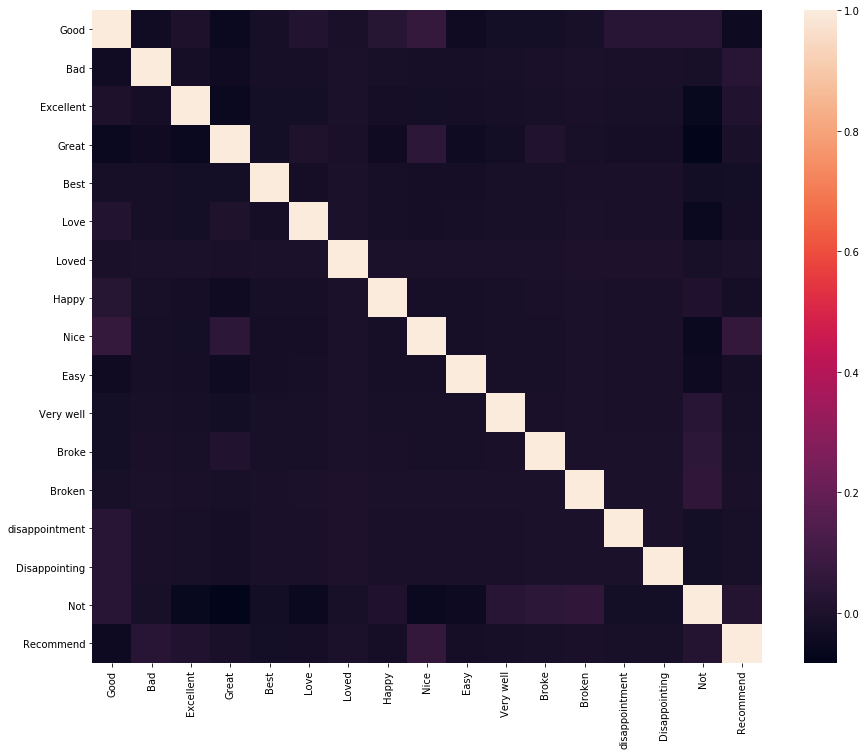

In [6]:
#Doing a heat map of our independent variables
fig, ax = plt.subplots(figsize=(15,12)) 
sns.heatmap(df[keywords].corr())
plt.show()

Making sure our variables have low correlation so they work well with our model.

In [7]:
#Setting outcome target and independent variables
data = df[keywords]
target = df['is_positive']

#Running Naive Bayes Bernoulli
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 249


In [8]:
#Running model on IMDB data set

imdb_df = pd.read_table('imdb_labelled.txt',header=None, names=['message','is_positive'])

for key in keywords:
    imdb_df[str(key)] = imdb_df.message.str.contains('(?:(?<=^)|(?<=\s))' + str(key) + '(?=$|[,.!]|\s)', case=False)

#Setting outcome target and independent variables
data = imdb_df[keywords]
target = imdb_df['is_positive']

#Running Naive Bayes Bernoulli
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 299


In [9]:
#Running model on Yelp data set
yelp_df = pd.read_table('yelp_labelled.txt',header=None, names=['message','is_positive'])

for key in keywords:
    yelp_df[str(key)] = yelp_df.message.str.contains('(?:(?<=^)|(?<=\s))' + str(key) + '(?=$|[,.!]|\s)', case=False)

#Setting outcome target and independent variables
data = yelp_df[keywords]
target = yelp_df['is_positive']

#Running Naive Bayes Bernoulli
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(data, target)
y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 315
